# Usage: `niwidgets` examples

An online interactive version of this notebook can be found on [Binder](https://mybinder.org/v2/gh/nipy/niwidgets/master?filepath=index.ipynb).


# Volume data

The class for volume images is `NiftiWidget`. It takes a path to a `.nii` file as input.

## Interactively plotting an image

We'll start by demonstrating the most useful aspect of the package: Being able to interactively slice an image file. To do so, we will import one of the example files that ships with `niwidgets`, a T1 weighted structural scan.

In [1]:
import bqplot as bq
from IPython.display import display

x_data = range(10)
y_data = [i ** 2 for i in x_data]

x_sc = bq.LinearScale()
y_sc = bq.LinearScale()

ax_x = bq.Axis(label='Test X', scale=x_sc, tick_format='0.0f')
ax_y = bq.Axis(label='Test Y', scale=y_sc,
            orientation='vertical', tick_format='0.2f')

line = bq.Lines(x=x_data,
             y=y_data,
             scales={'x': x_sc, 'y': y_sc},
             colors=['red', 'yellow'])

fig = bq.Figure(axes=[ax_x, ax_y], marks=[line])

display(fig)


Figure(axes=[Axis(label='Test X', scale=LinearScale(), tick_format='0.0f'), Axis(label='Test Y', orientation='…

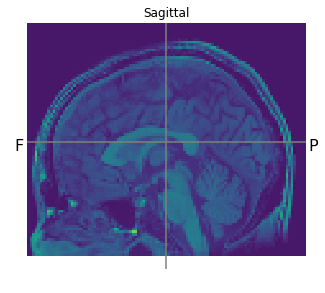

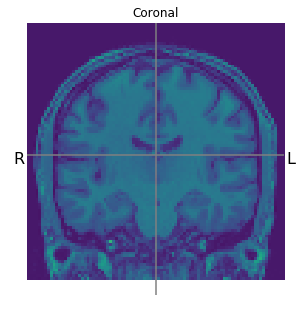

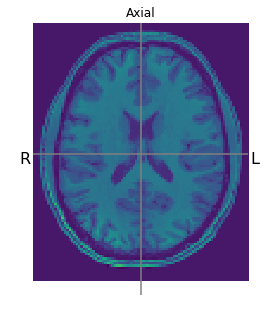

In [2]:
# Let's try a simple parcellation map from a standard atlas
from niwidgets.niwidget_volume import VolumeWidget
from niwidgets import examplet1

test_widget = VolumeWidget(examplet1)
test_widget

## Use plotting functions from `nilearn`

`niwidgets` also lets you turn standard plots from the nilearn package into widgets. You can use any of them, and provide your own keyword arguments to set the slider options (if no key word argument is provided defaults are used).

In particular, `niwidgets` should allow you to pick a colormap interactively for almost any plot type

### `plot_epi`

Plotting the same image but with the `nilearn` function `plot_epi`, we get this:


interactive(children=(Dropdown(description='display_mode', options=('ortho', 'x', 'y', 'z', 'yx', 'xz', 'yz'),…

<Figure size 432x288 with 0 Axes>

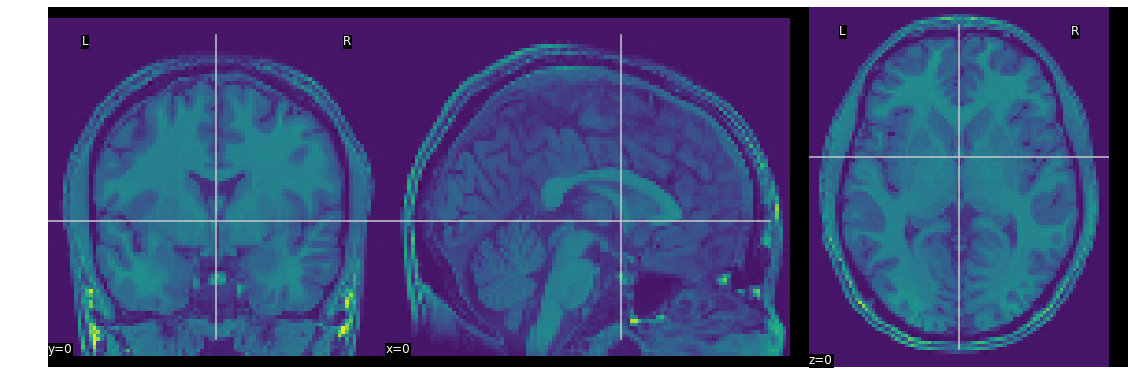

In [3]:
import nilearn.plotting as nip

test_widget.nifti_plotter(plotting_func=nip.plot_epi, display_mode=['ortho', 'x', 'y', 'z', 'yx', 'xz', 'yz'])

### `plot_glass_brain`

This is an example of a glass brain plot with a standard visual perception activation map from neurosynth (this also ships as an example with `niwidgets`:

interactive(children=(FloatSlider(value=5.0, description='threshold', max=10.0, step=0.01), Dropdown(descripti…

<Figure size 432x288 with 0 Axes>

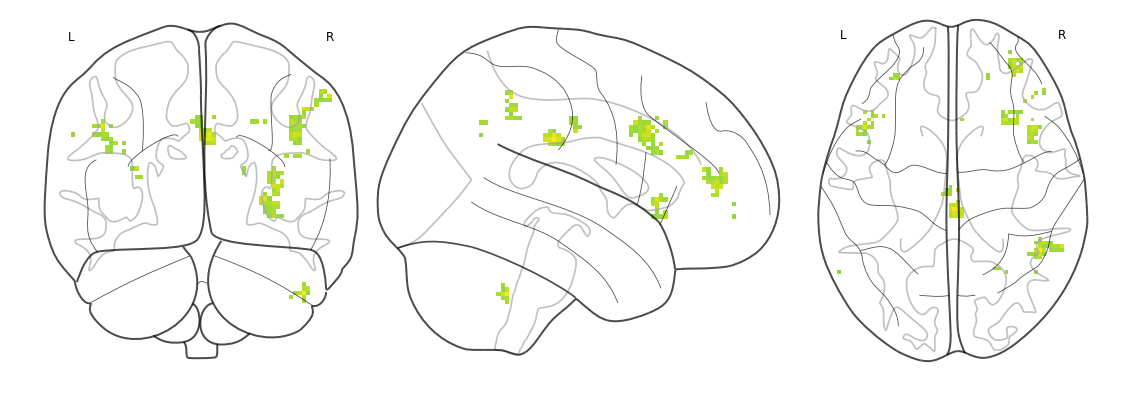

In [4]:
from niwidgets import examplezmap
import nilearn.plotting as nip
test = NiftiWidget(examplezmap)
test.nifti_plotter(plotting_func=nip.plot_glass_brain, threshold=(0.0, 10.0, 0.01),
                   display_mode=['ortho','xz'])

### `plot_img`

Another image slicer type plot from the nilearn package, this time with an example atlas (the CC400 atlas), and setting the colormap:

interactive(children=(Dropdown(description='display_mode', options=('ortho', 'x', 'y', 'z'), value='ortho'), I…

<Figure size 432x288 with 0 Axes>

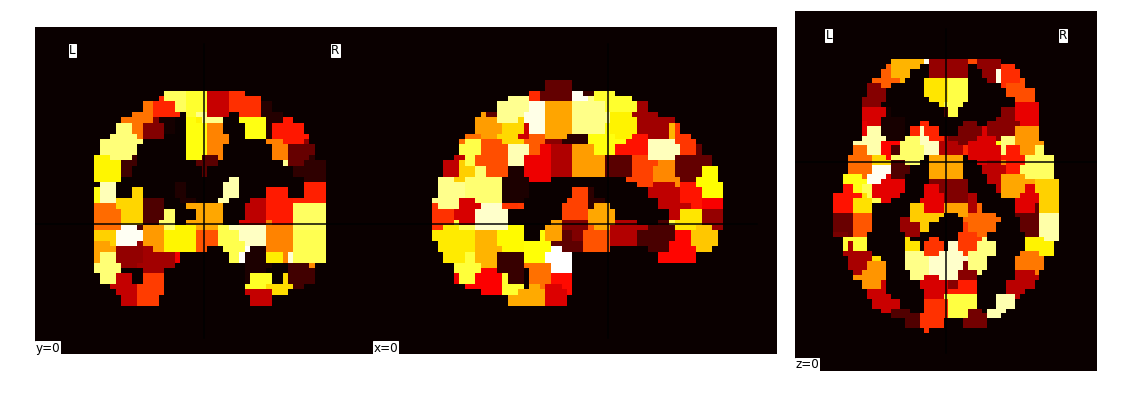

In [5]:
from niwidgets import NiftiWidget
from niwidgets import exampleatlas
atlas_widget = NiftiWidget(exampleatlas)
atlas_widget.nifti_plotter(plotting_func=nip.plot_img, display_mode=['ortho', 'x', 'y', 'z'], colormap='hot')

# Surface data

If you have surface data, you can import the `SurfaceWidget` and use it in a similar fashion to the `NiftiWidget`. Import and define it in the same way:

In [4]:
from niwidgets import SurfaceWidget
from niwidgets.exampledata import examplesurface

surface_widget = SurfaceWidget(examplesurface)
surface_widget.surface_plotter()

interactive(children=(Dropdown(description='Colormap:', options=('viridis', 'summer', 'gray', 'Blues', 'Greens…

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

If you want to plot additional data as overlays, you can pass those as either loaded `GiftiImages` (loaded using nibabel), or as file paths to a `.annot`, `.thickness`, `.curv`, `.sulc`, or `.gii` file.

If you pass them in a dictionary (see e.g. `niwidgets.exampledata.exampleoverlays`), the keys of the dictionary are used for the Options in a dropdown menu:

In [8]:
from niwidgets import SurfaceWidget
from niwidgets.exampledata import examplesurface
from niwidgets.exampledata import exampleoverlays

surface_widget = SurfaceWidget(examplesurface, overlayfiles=exampleoverlays)

surface_widget.surface_plotter()

interactive(children=(Dropdown(description='Overlay:', options=('Area', 'Curvature', 'Thickness', 'Annotation'), value='Area'), Dropdown(description='Colormap:', index=73, options=('Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'Dark2', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'Paired', 'Pastel1', 'Pastel2', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Set1', 'Set2', 'Set3', 'Spectral', 'Vega10', 'Vega20', 'Vega20b', 'Vega20c', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spectral', 'spring', 'summer', 'tab10', 'tab20', 'tab20b', 'tab20c', 'terrain', 'winter'), value='summer'), Output()), _dom_classes=('widget-interact',))

Figure(camera_center=[0.0, 0.0, 0.0], camera_fov=1.0, height=600, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]]), texture=None, triangles=array([[     0,      1,      3],
       [     4,      3,      1],
       [     0,     91,      1],
       ...,
       [123307, 123906, 123895],
       [123906, 123907, 123895],
       [123885, 124986, 124987]], dtype=uint32), x=array([18.7413578 , 18.37849426, 19.00789833, ..., 17.78539658,
       17.8218174 , 17.95105362]), y=array([-127.09669495, -127.08947754, -127.14855194, ...,   96.06409454,
         96.46263123,   96.3392868 ]), z=array([-48.42454529, -48.42292786, -48.9959259 , ...,  44.24810028,
        44.08300781,  44.18468475]))], style={'axes': {'color': 'black', 'label': {'color': 'black'}, 'ticklabel': {'color': 'black'}, 'visible': False}, 'background-color': 'white', 'box': {'visible': False}}, tf=None, width=600, xlim=[-100.0, 100.0], ylim=[-127.3917007446289, 127.3917007446289], zlim=[-100.0, 100.0])

## Streamlines

If you have mrtrix or trackvis streamlines, you can display them using the `StreamlineWidget`. Instead of passing a streamlines file, one can also pass a nibabel streamline sequence to the widget.

In [9]:
from niwidgets import StreamlineWidget
from niwidgets.exampledata import streamlines

sw = StreamlineWidget(filename=streamlines)
style = {'axes': {'color': 'red',
                  'label': {'color': 'white'},
                  'ticklabel': {'color': 'white'},
                  'visible': False},
         'background-color': 'white',
         'box': {'visible': False}}
sw.plot(display_fraction=0.5, width=500, height=500, style=style, percentile=80)

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], camera_fov=1.0, height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array([[ 0.5103893 ,  0.7629744 , -0.3967025 ],
       [ 0.5103893 ,  0.7629744 , -0.3967025 ],
       [ 0.5103893 ,  0.7629744 , -0.3967025 ],
       ...,
       [-0.06500284, -0.4601881 ,  0.8854386 ],
       [-0.06500284, -0.4601881 ,  0.8854386 ],
       [-0.06500284, -0.4601881 ,  0.8854386 ]], dtype=float32), lines=array([     0,      1,      1, ..., 161141, 161141, 161142], dtype=uint32), texture=None, x=array([76.33768 , 76.1091  , 75.86626 , ..., 49.14276 , 49.224125,
       49.276688], dtype=float32), y=array([49.301598, 48.87002 , 48.451088, ..., 45.552483, 45.69906 ,
       45.840733], dtype=float32), z=array([28.900988  , 29.0082    , 29.132801  , ...,  0.87795854,
        0.40690082, -0.0697186 ], dtype=float32))], style={'axes': {'color': 'red', 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'visible': False}, 'background-color': 'white', 'box': {'visible': False}}, tf=None, xlim=[-0.497088223695755, 94.8163833618164], ylim=[-0.497088223695755, 94.8163833618164], zlim=[-0.497088223695755, 94.8163833618164]),))

interactive(children=(FloatSlider(value=43.99999313354492, continuous_update=False, description='threshold', max=97.0, min=13.999998092651367), Output()), _dom_classes=('widget-interact',))